In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Mexico = pd.read_csv("Listings Final Mexico.csv", on_bad_lines='skip')
Mexico

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico","I'm Marco. I am a graphic designer, but I also...",within an hour,100%,88%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Roma Norte,3,6,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,NaN,19.420630,-99.165860,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,NaN,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,NaN,f,3,2,1,0,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.382830,-99.271780,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...","$3,663.00",1,7,1,1,7,7,1.0,7.0,NaN,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,92%,t,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,17,17,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,NaN,19.411620,-99.177940,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...","$18,000.00",1,365,1,1,365,365,1.0,365.0,NaN,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,NaN,f,13,4,2,0,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06

In [4]:
#Convertir la variable price a numerico
Mexico['price'] = Mexico['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_14992\1008147510.py:2: SyntaxWarning: invalid escape sequence '\$'
  Mexico['price'] = Mexico['price'].replace('[\$,]', '', regex=True).astype(float)


In [5]:
#Identificar valores nulos por columna
Valores_Nulos= Mexico.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

description                       951
neighborhood_overview           10290
host_location                    5606
host_about                      11182
host_response_time               4197
host_response_rate               4197
host_acceptance_rate             2855
host_is_superhost                1543
host_neighbourhood              13355
neighbourhood                   10290
neighbourhood_group_cleansed    26536
bathrooms                        3129
bathrooms_text                     25
bedrooms                         1071
beds                             3164
price                            3198
calendar_updated                26536
has_availability                 1036
first_review                     3872
last_review                      3872
review_scores_rating             3872
review_scores_accuracy           3887
review_scores_cleanliness        3888
review_scores_checkin            3887
review_scores_communication      3887
review_scores_location           3887
review_score

In [6]:
#Información tipos de columnas
Tipos_Columnas = Mexico[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

description              object
neighborhood_overview    object
host_location            object
host_about               object
host_response_time       object
host_response_rate       object
host_acceptance_rate     object
host_is_superhost        object
host_neighbourhood       object
neighbourhood            object
bathrooms_text           object
has_availability         object
first_review             object
last_review              object
dtype: object

In [7]:
#Información tipos de columnas
Tipos_Columnas = Mexico[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

neighbourhood_group_cleansed    float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
calendar_updated                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
reviews_per_month               float64
dtype: object

In [8]:
#Realizamos una copia del dataframe
copia_Mexico = Mexico.copy()

In [9]:
#Sustituir valores nulos por un string en  concreto
copia_Mexico["description"] = copia_Mexico["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Mexico["neighborhood_overview"] = copia_Mexico["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_name"] = copia_Mexico["host_name"].fillna("ANONIMO")
copia_Mexico["host_location"] = copia_Mexico["host_location"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_about"] = copia_Mexico["host_about"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_response_time"] = copia_Mexico["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_response_rate"] = copia_Mexico["host_response_rate"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_acceptance_rate"] = copia_Mexico["host_acceptance_rate"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_is_superhost"] = copia_Mexico["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["host_neighbourhood"] = copia_Mexico["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_total_listings_count"] = copia_Mexico["host_total_listings_count"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_verifications"] = copia_Mexico["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["host_identity_verified"] = copia_Mexico["host_identity_verified"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["neighbourhood"] = copia_Mexico["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Mexico["neighbourhood_group_cleansed"] = copia_Mexico["neighbourhood_group_cleansed"].fillna("SIN INFORMACIÓN")
copia_Mexico["room_type"] = copia_Mexico["room_type"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["accommodates"] = copia_Mexico["accommodates"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bathrooms"] = copia_Mexico["bathrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bathrooms_text"] = copia_Mexico["bathrooms_text"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bedrooms"] = copia_Mexico["bedrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["amenities"] = copia_Mexico["amenities"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["maximum_nights"] = copia_Mexico["maximum_nights"].fillna("NO DEFINIDO")
copia_Mexico["minimum_minimum_nights"] = copia_Mexico["minimum_minimum_nights"].fillna("NO DEFINIDO")
copia_Mexico["calendar_updated"] = copia_Mexico["calendar_updated"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["has_availability"] = copia_Mexico["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_30"] = copia_Mexico["availability_30"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_60"] = copia_Mexico["availability_60"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_90"] = copia_Mexico["availability_90"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_365"] = copia_Mexico["availability_365"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["calendar_last_scraped"] = copia_Mexico["calendar_last_scraped"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["number_of_reviews"] = copia_Mexico["number_of_reviews"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["number_of_reviews_ltm"] = copia_Mexico["number_of_reviews_ltm"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["first_review"] = copia_Mexico["first_review"].fillna("SIN RESEÑA")
copia_Mexico["last_review"] = copia_Mexico["last_review"].fillna("SIN RESEÑA")
copia_Mexico["review_scores_rating"] = copia_Mexico["review_scores_rating"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["review_scores_cleanliness"] = copia_Mexico["review_scores_cleanliness"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["review_scores_location"] = copia_Mexico["review_scores_location"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["instant_bookable"] = copia_Mexico["instant_bookable"].fillna("INFORMACIÓN NO DISPONIBLE")

In [10]:
#Sustituir valores nulos con promedio o media
copia_Mexico["minimum_nights"] = copia_Mexico["minimum_nights"].fillna(round(copia_Mexico["minimum_nights"].mean(), 1))
copia_Mexico["maximum_maximum_nights"] = copia_Mexico["maximum_maximum_nights"].fillna(round(copia_Mexico["maximum_maximum_nights"].mean(), 1))
copia_Mexico["maximum_nights_avg_ntm"] = copia_Mexico["maximum_nights_avg_ntm"].fillna(round(copia_Mexico["maximum_nights_avg_ntm"].mean(), 1))
copia_Mexico["number_of_reviews_l30d"] = copia_Mexico["number_of_reviews_l30d"].fillna(round(copia_Mexico["number_of_reviews_l30d"].mean(), 1))
copia_Mexico["review_scores_accuracy"] = copia_Mexico["review_scores_accuracy"].fillna(round(copia_Mexico["review_scores_accuracy"].mean(), 1))
copia_Mexico["review_scores_checkin"] = copia_Mexico["review_scores_checkin"].fillna(round(copia_Mexico["review_scores_checkin"].mean(), 1))
copia_Mexico["price"] = copia_Mexico["price"].fillna(round(copia_Mexico["price"].mean(), 1))
copia_Mexico["review_scores_communication"] = copia_Mexico["review_scores_communication"].fillna(round(copia_Mexico["review_scores_communication"].mean(), 1))
copia_Mexico["review_scores_value"] = copia_Mexico["review_scores_value"].fillna(round(copia_Mexico["review_scores_value"].mean(), 1))
copia_Mexico["calculated_host_listings_count"] = copia_Mexico["calculated_host_listings_count"].fillna(round(copia_Mexico["calculated_host_listings_count"].mean(), 1))
copia_Mexico["calculated_host_listings_count_entire_homes"] = copia_Mexico["calculated_host_listings_count_entire_homes"].fillna(round(copia_Mexico["calculated_host_listings_count_entire_homes"].mean(), 1))
copia_Mexico["calculated_host_listings_count_private_rooms"] = copia_Mexico["calculated_host_listings_count_private_rooms"].fillna(round(copia_Mexico["calculated_host_listings_count_private_rooms"].mean(), 1))
copia_Mexico["calculated_host_listings_count_shared_rooms"] = copia_Mexico["calculated_host_listings_count_shared_rooms"].fillna(round(copia_Mexico["calculated_host_listings_count_shared_rooms"].mean(), 1))
copia_Mexico["reviews_per_month"] = copia_Mexico["reviews_per_month"].fillna(round(copia_Mexico["reviews_per_month"].mean(), 1))

In [11]:
#Sustituir valores nulos por un valor numérico en  concreto
copia_Mexico["beds"]=copia_Mexico["beds"].fillna("-")
copia_Mexico["license"]=copia_Mexico["license"].fillna("0")

In [12]:
#Corroboramos valores nulos
# Ajustar maximo de filas
valores_nulos=copia_Mexico.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [13]:
#Seleccionar variables relevantes
Mexico_variables = copia_Mexico[['listing_url', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [14]:
Mexico_variables.head()

,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/898633,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100%,88%,t,Roma Norte,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",1652.0,t,56,4.95,f,3,0.41
1,https://www.airbnb.com/rooms/35797,2024-06-27,city scrape,Villa Dante,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0%,SIN INFORMACIÓN,f,SIN INFORMACIÓN,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,2,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",3663.0,t,0,INFORMACIÓN NO DISPONIBLE,f,1,1.70
2,https://www.airbnb.com/rooms/44616,2024-06-28,city scrape,CONDESA HAUS B&B,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100%,92%,t,Condesa,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,14,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",18000.0,t,64,4.58,f,13,0.42
3,https://www.airbnb.com/rooms/913084,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,https://www.airbnb.com/users/show/4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,100%,96%,t,SIN INFORMACIÓN,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,4,1 bath,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",814.0,t,161,4.75,t,1,1.19
4,https://www.airbnb.com/rooms/67703,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,89%,62%,t,Hipódromo,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",1923.0,t,49,4.9,f,2,0.32


ELIMINAR OUTLIERS POR DESVIACION ESTANDAR

In [15]:
Mexico_variables.dtypes

listing_url                        object
last_scraped                       object
source                             object
name                               object
host_url                           object
host_name                          object
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                 object
host_acceptance_rate               object
host_is_superhost                  object
host_neighbourhood                 object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                           object
beds                               object
amenities                         

In [16]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Mexico_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Mexico_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

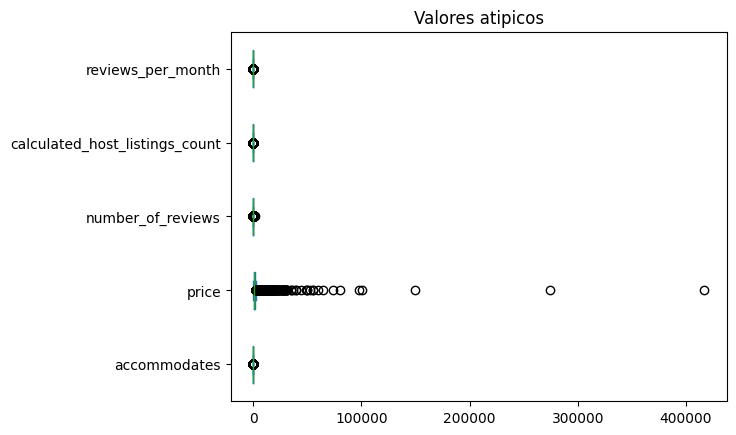

In [17]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [18]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido accommodates                         10.367106
price                             13214.172810
number_of_reviews                   262.987146
calculated_host_listings_count      147.053524
reviews_per_month                     6.989101
dtype: float64
Limite inferior permitido accommodates                         -3.685316
price                            -10260.222856
number_of_reviews                  -176.087990
calculated_host_listings_count     -112.690847
reviews_per_month                    -3.589922
dtype: float64


In [19]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [20]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

accommodates                      500
price                             130
number_of_reviews                 611
calculated_host_listings_count    718
reviews_per_month                 389
dtype: int64

In [21]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [22]:
#Se juntan las columnas cualitativas con las cuantitativas
Mexico_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Mexico_outliers.head()

,accommodates,price,number_of_reviews,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,has_availability,review_scores_rating,instant_bookable
0,2.0,1652.0,56.0,3.0,0.41,https://www.airbnb.com/rooms/898633,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100%,88%,t,Roma Norte,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",t,4.95,f
1,2.0,3663.0,0.0,1.0,1.70,https://www.airbnb.com/rooms/35797,2024-06-27,city scrape,Villa Dante,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0%,SIN INFORMACIÓN,f,SIN INFORMACIÓN,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",t,INFORMACIÓN NO DISPONIBLE,f
2,3.1,1333.4,64.0,13.0,0.42,https://www.airbnb.com/rooms/44616,2024-06-28,city scrape,CONDESA HAUS B&B,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100%,92%,t,Condesa,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",t,4.58,f
3,4.0,814.0,161.0,1.0,1.19,https://www.airbnb.com/rooms/913084,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,https://www.airbnb.com/users/show/4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,100%,96%,t,SIN INFORMACIÓN,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",t,4.75,t
4,4.0,1923.0,49.0,2.0,0.32,https://www.airbnb.com/rooms/67703,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,89%,62%,t,Hipódromo,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",t,4.9,f


In [23]:
#Comprobamos que no existan valores nulos
valores_nulos_Mexico_outliers = Mexico_outliers.isnull().sum()
valores_nulos_Mexico_outliers

accommodates                      0
price                             0
number_of_reviews                 0
calculated_host_listings_count    0
reviews_per_month                 0
listing_url                       0
last_scraped                      0
source                            0
name                              0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_neighbourhood                0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
bathrooms_text                    0
bedrooms                          0
beds                              0
amenities                   

In [24]:
Mexico_outliers.to_csv('Mexico sin outliers.csv', index=False)